In [4]:
knitr::opts_chunk$set(echo = TRUE)
source("function_BBD.R")
options(width=120)

## Data

In [5]:
M<-read.csv("M.csv")
S<-read.csv("SP.csv")
data<-list()
d<-list()
Ts<-c()
data[[1]]<-M[1:99,6:7]
data[[2]]<-M[62:99,6:7]
data[[3]]<-S[1:38,6:7]
data[[4]]<-M[71:99,6:7]
data[[5]]<-S[10:38,6:7]

data[[6]]<-M[1:99,2:3]
data[[7]]<-M[62:99,2:3]
data[[8]]<-S[1:38,2:3]
data[[9]]<-M[71:99,2:3]
data[[10]]<-S[10:38,2:3]

data[[11]]<-M[1:99,4:5]
data[[12]]<-M[62:99,4:5]
data[[13]]<-S[1:38,4:5]
data[[14]]<-M[71:99,4:5]
data[[15]]<-S[10:38,4:5]

I<-15
for(i in 1:I){
  Ts[i]<-nrow(data[[i]])
   d[[i]]<-list(T=Ts[i],n_t=data[[i]][,1],k_t=data[[i]][,2])
}
titles<-c("Moody's,ALL,1920-2018","Moody's,ALL,1981-2018","S&P,ALL,1981-2017","Moody's,ALL,1990-2018","S&P,ALL,1990-2017",
          "Moody's,SG,1920-2018","Moody's,SG,1981-2018","S&P,SG,1981-2017","Moody's,SG,1990-2018","S&P,SG,1990-2017",
          "Moody's,IG,1920-2018","Moody's,IG,1981-2018","S&P,IG,1981-2017","Moody's,IG,1990-2018","S&P,IG,1990-2017")

- Moody's and S&P Data

- Default rate

$$
\frac{k_t}{n_t}
$$



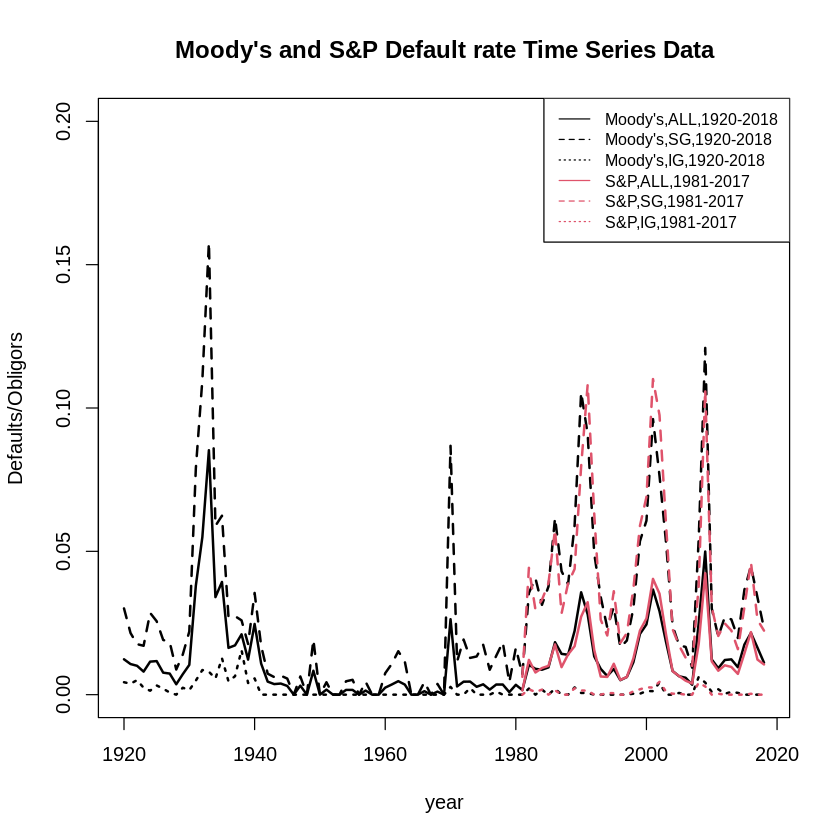

In [6]:
plot(1920:2018,data[[1]][,2]/data[[1]][,1],type="l",lwd=2,main="Moody's and S&P Default rate Time Series Data",xlab="year",ylab="Defaults/Obligors",ylim=c(0,0.2))
points(1920:2018,data[[6]][,2]/data[[6]][,1],type="l",lty=2,lwd=2)
points(1920:2018,data[[11]][,2]/data[[11]][,1],type="l",lty=3,lwd=2)
points(1981:2018,data[[3]][,2]/data[[3]][,1],type="l",lty=1,lwd=2,col=2)
points(1981:2018,data[[8]][,2]/data[[8]][,1],type="l",lty=2,lwd=2,col=2)
points(1981:2018,data[[13]][,2]/data[[13]][,1],type="l",lty=3,lwd=2,col=2)
legend("topright",horiz=FALSE,legend=c(titles[1],titles[6],titles[11],titles[3],titles[8],titles[13]),col=c(1,1,1,2,2,2),lty=c(1,2,3,1,2,3),cex=0.8)

- 平均デフォルト率

$$
\lambda_{avg}=\sum_{t=1}^{T}k_t/\sum_{t}n_t
$$


In [7]:
lambda_avg<-c()
I<-15
for(i in 1:I){
lambda_avg[i]<-round(sum(data[[i]][,2])/sum(data[[i]][,1]),3)
}

## BBDと最尤推定

- ベータ二項分布

$$
P(k_{t}|n_t,\alpha,\beta)={}_{n_{t}}C_{k_{t}} \frac{B(\alpha+k_{t},\beta+(n_t-k_t))}{B(\alpha,\beta)}
$$

$$
\theta=\frac{\alpha}{\alpha+\beta},\rho_{D}=\frac{1}{\alpha+\beta+1}
$$
$$
\alpha=\frac{1-\rho_{D}}{\rho_{D}}\theta,\beta=\frac{1-\rho_{D}}{\rho_{D}}(1-\theta)
$$



-　対数尤度

$$
\log L(\theta,\rho_{D})\equiv \sum_{t=1}^{T}\log P(k_{t}|n_{t},\theta,\rho_{D})
$$


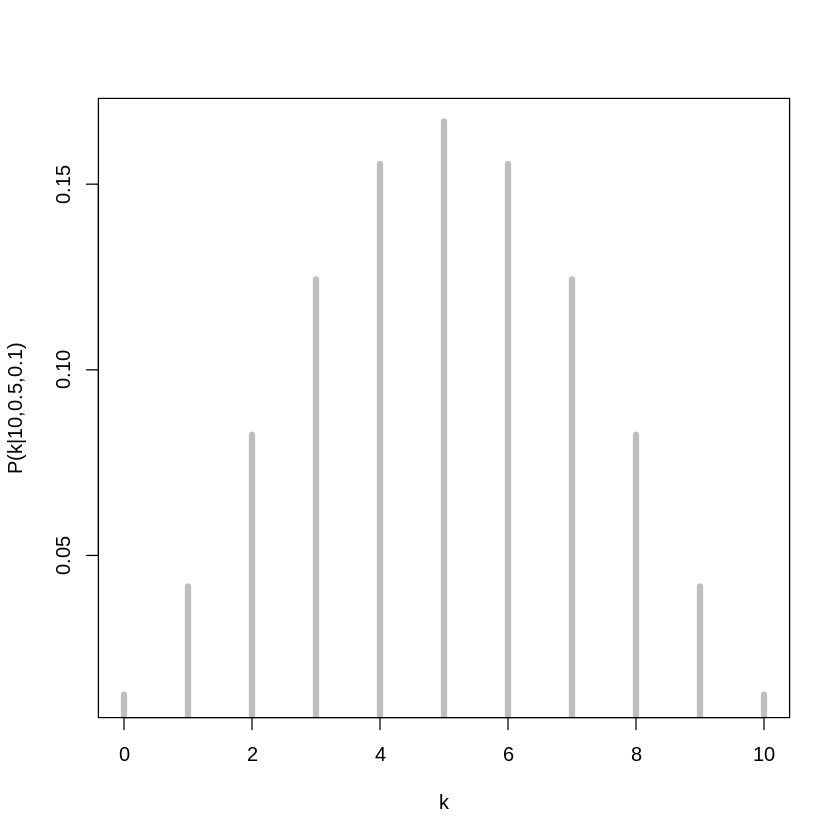

In [8]:
N<-10
theta<-0.5
rho_D<-0.1
plot(0:N,Vectorize(dBBD)(0:N,N,theta,rho_D),type="h",col="gray",lwd=5,xlab="k",ylab="P(k|10,0.5,0.1)")

In [9]:
theta_BBD<-c()
rho_BBD<-c()
logL_BBD<-c()

for(i in 1:15){
k<-data[[i]][,2]
N<-data[[i]][,1]

f<-function(x){
if(x[2]>=0 & x[2]<1 & x[1]>0 & x[1]<1){
ans<-1
for(t in 1:length(k)){
 ans<-ans+dLBBD(k[t],N[t],x[1],x[2])
}
}
else{
ans<-(-10000)
}
return(ans)
}

res<-optim(c(0.01,0.01),hessian=TRUE,f,control=list(fnscale=-1))
#res<-optim(c(0.01,0.01),f,method="BFGS",control=list(fnscale=-1))
pars<-round(res$par,3)
theta_BBD[i]<-pars[1]
rho_BBD[i]<-pars[2]
logL_BBD[i]<-round(res$value,1)
}

In [10]:
theta_BBD

[1] 0.012 0.015 0.015 0.016 0.016 0.029 0.042 0.041 0.043 0.043 0.001 0.001 0.001 0.001 0.001

## BBD時間相関モデル$:d_1>0,d_i=0,i\ge 2$

$$
P(k_{t}|n_t,\alpha_t,\beta_t)
={}_{n_{t}}C_{k_{t}} \frac{B(\alpha_t+k_{t},\beta_t+(n_t-k_t))}{B(\alpha_t,\beta_t)}
$$

-  $t=1$

$$
\alpha_{1}=\alpha=\frac{1-\rho_{D}}{\rho_{D}}\theta\,\,\, ,\,\,\, \beta_{1}=\beta=\frac{1-\rho_{D}}{\rho_{D}}(1-\theta)
$$

-  $t\ge 2$

$$
\alpha_{t}=\alpha+d_{1}k_{t-1} \,\,\, ,\,\,\, \beta_t=\beta+d_{1}(n_{t-1}-k_{t-1})
$$




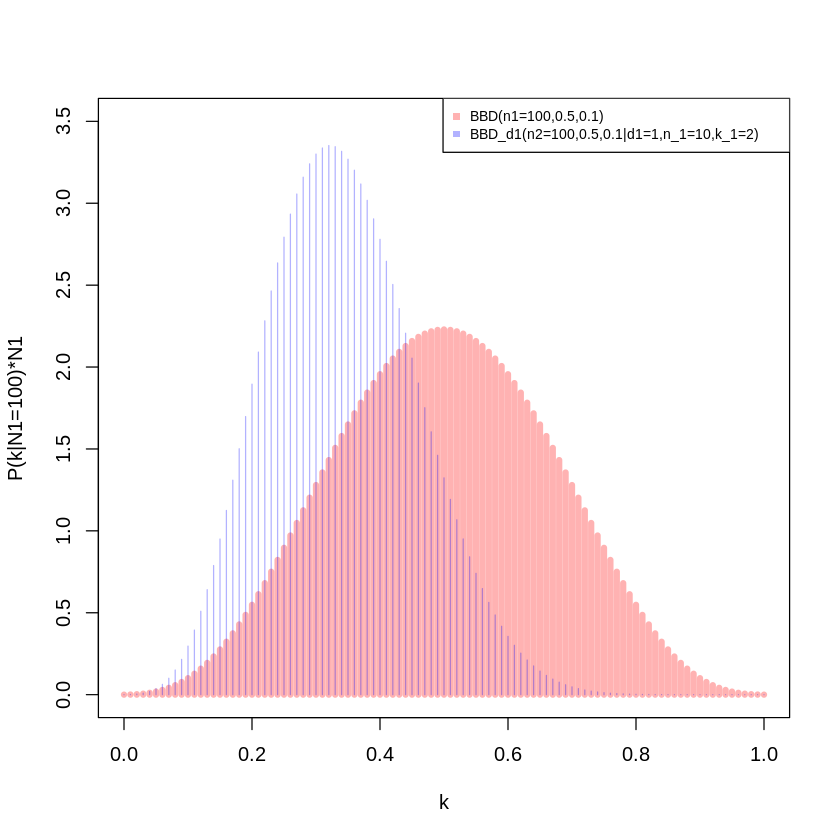

In [11]:
N1<-100;theta<-0.5;rho_D<-0.1;n_p<-10;k_p<-2;d_1<-1
plot((0:N1)/N1,N1*Vectorize(dBBD)(0:N1,N1,theta,rho_D),type="h",col=rgb(1,0,0,alpha=0.3),lwd=5,xlab="k",ylab="P(k|N1=100)*N1",ylim=c(0,3.5))
points((0:N1)/N1,N1*Vectorize(dBBD_d1)(0:N1,N1,theta,rho_D,d_1,n_p,k_p),type="h",col=rgb(0,0,1,alpha=0.3))
legend("topright",legend=c("BBD(n1=100,0.5,0.1)","BBD_d1(n2=100,0.5,0.1|d1=1,n_1=10,k_1=2)"),col=c(rgb(1,0,0,alpha=0.3),rgb(0,0,1,alpha=0.3)),pch=15,cex=0.7)

-　対数尤度

$$
\log L(\theta,\rho_{D},d_1)\equiv \sum_{t=1}^{T}\log P(k_{t}|n_{t},\alpha_t,\beta_t)
$$


In [12]:
theta_d1<-c()
rho_d1<-c()
d1_d1<-c()
logL_d1<-c()

for(i in 1:15){
k<-data[[i]][,2]
N<-data[[i]][,1]

f<-function(x){
if(x[2]>=0 & x[2]<1 & x[1]>0 & x[1]<1 & x[3]>0 & x[3]<1){
t<-1
ans<-dLBBD(k[t],N[t],x[1],x[2])
for(t in 2:length(k)){
 ans<-ans+dLBBD_d1(k[t],N[t],x[1],x[2],x[3],N[t-1],k[t-1])
}
}
else{
ans<-(-10000)
}
return(ans)
}
#res<-optim(c(0.01,0.01,0.1),hessian=TRUE,f,control=list(fnscale=-1))
res<-optim(c(0.01,0.01,0.1),f,method="BFGS",control=list(fnscale=-1))
pars<-round(res$par,3)
theta_d1[i]<-pars[1]
rho_d1[i]<-pars[2]
d1_d1[i]<-pars[3]
logL_d1[i]<-round(res$value,1)
}

## Exponential temporal correlation

$$
d_i=r^{i},i=1,\cdots,r\le 1
$$


$$
\alpha_{t}=\alpha+\sum_{s=1}^{t-1}d_{s}k_{t-s}         \,\,\, ,\,\,\, \beta_t=\beta+\sum_{s=1}^{t-1}d_{s}(n_{t-s}-k_{t-s})
$$

$$
P(k_{t}|n_t,\alpha_t,\beta_t)={}_{n_{t}}C_{k_{t}} \frac{B(\alpha_t+k_{t},\beta_t+(n_t-k_t))}{B(\alpha_t,\beta_t)}
$$


$$
\log L(\theta,\rho_{D},r)\equiv
\sum_{t=1}^{T}\log P(k_{t}|n_{t},\alpha_t,\beta_t)
$$





In [13]:
theta_EXP<-c()
rho_EXP<-c()
r_EXP<-c()
logL_EXP<-c()

for(i in 1:15){

k<-data[[i]][,2]
N<-data[[i]][,1]

f<-function(x){
if(x[2]>=0 & x[2]<1 & x[1]>0 & x[1]<1 & x[3]>0 & x[3]<1){
t<-1
ans<-0
for(t in 1:length(k)){
ans<-ans+dLBBD_EXP(t,k,N,x[1],x[2],x[3])
}
}
else{
ans<-(-10000)
}
return(ans)
}
#res<-optim(c(0.01,0.01,0.1),hessian=TRUE,f,control=list(fnscale=-1))
res<-optim(c(0.1,0.01,0.9),f,method="BFGS",control=list(fnscale=-1))
pars<-round(res$par,3)
theta_EXP[i]<-pars[1]
rho_EXP[i]<-pars[2]
r_EXP[i]<-pars[3]
logL_EXP[i]<-round(res$value,1)
}

## Power temporal correlation


$$
d_i=1/(1+i)^{\gamma},i=1,\cdots,\gamma\ge 0
$$


$$
\alpha_{t}=\alpha+\sum_{s=1}^{t-1}d_{s}k_{t-s}         \,\,\, ,\,\,\, \beta_t=\beta+\sum_{s=1}^{t-1}d_{s}(n_{t-s}-k_{t-s})
$$

$$
P(k_{t}|n_t,\alpha_t,\beta_t)={}_{n_{t}}C_{k_{t}} \frac{B(\alpha_t+k_{t},\beta_t+(n_t-k_t))}{B(\alpha_t,\beta_t)}
$$

$$
\log L(\theta,\rho_{D},r)\equiv
\sum_{t=1}^{T}\log P(k_{t}|n_{t},\alpha_t,\beta_t)
$$




In [14]:
theta_POW<-c()
rho_POW<-c()
r_POW<-c()
logL_POW<-c()

for(i in 1:15){

k<-data[[i]][,2]
N<-data[[i]][,1]

f<-function(x){
if(x[2]>=0 & x[2]<1 & x[1]>0 & x[1]<1 & x[3]>0.001 & x[3]<100){
t<-1
ans<-0
for(t in 1:length(k)){
ans<-ans+dLBBD_POW(t,k,N,x[1],x[2],x[3])
}
}
else{
ans<-(-10000)
}
return(ans)
}

#res<-optim(c(0.01,0.01,5.0),hessian=TRUE,f,control=list(fnscale=-1))
res<-optim(c(0.1,0.01,0.9),f,method="BFGS",control=list(fnscale=-1))
pars<-round(res$par,3)
theta_POW[i]<-pars[1]
rho_POW[i]<-pars[2]
r_POW[i]<-pars[3]
logL_POW[i]<-round(res$value,1)
}

- $\theta$

In [15]:
BBD_lambda<-data.frame(titles,Default_rate=lambda_avg,BBD=theta_BBD,d1=theta_d1,EXP=theta_EXP,POW=theta_POW)
BBD_lambda

titles,Default_rate,BBD,d1,EXP,POW
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Moody's,ALL,1920-2018",0.015,0.012,0.009,0.009,0.012
"Moody's,ALL,1981-2018",0.016,0.015,0.015,0.015,0.015
"S&P,ALL,1981-2017",0.015,0.015,0.014,0.014,0.015
"Moody's,ALL,1990-2018",0.016,0.016,0.016,0.016,0.016
"S&P,ALL,1990-2017",0.016,0.016,0.016,0.016,0.016
"Moody's,SG,1920-2018",0.037,0.029,0.023,0.023,0.023
"Moody's,SG,1981-2018",0.041,0.042,0.042,0.042,0.042
"S&P,SG,1981-2017",0.039,0.041,0.042,0.042,0.042
"Moody's,SG,1990-2018",0.041,0.043,0.043,0.043,0.043


- $\rho$

In [16]:
BBD_rho<-data.frame(titles,BBD=rho_BBD,d1=rho_d1,EXP=rho_EXP,POW=rho_POW)
BBD_rho

titles,BBD,d1,EXP,POW
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"Moody's,ALL,1920-2018",0.013,0.019,0.019,0.013
"Moody's,ALL,1981-2018",0.006,0.007,0.007,0.007
"S&P,ALL,1981-2017",0.006,0.007,0.007,0.006
"Moody's,ALL,1990-2018",0.006,0.008,0.008,0.006
"S&P,ALL,1990-2017",0.006,0.009,0.009,0.009
"Moody's,SG,1920-2018",0.027,0.038,0.039,0.041
"Moody's,SG,1981-2018",0.014,0.018,0.018,0.018
"S&P,SG,1981-2017",0.015,0.020,0.020,0.020
"Moody's,SG,1990-2018",0.016,0.022,0.022,0.022


- Other Parameters

In [17]:
BBD_oth<-data.frame(titles,d1=d1_d1,r_EXP=r_EXP,r_POW=r_POW)
BBD_oth

titles,d1,r_EXP,r_POW
<chr>,<dbl>,<dbl>,<dbl>
"Moody's,ALL,1920-2018",0.048,0.046,19.192
"Moody's,ALL,1981-2018",0.023,0.021,5.806
"S&P,ALL,1981-2017",0.027,0.026,32.762
"Moody's,ALL,1990-2018",0.020,0.019,17.091
"S&P,ALL,1990-2017",0.024,0.023,5.740
"Moody's,SG,1920-2018",0.048,0.046,4.648
"Moody's,SG,1981-2018",0.022,0.021,5.853
"S&P,SG,1981-2017",0.027,0.026,5.588
"Moody's,SG,1990-2018",0.021,0.020,5.882


- AIC

In [18]:
BBD_AIC<-data.frame(titles,AIC_BBD=(-2)*(logL_BBD-2),AIC_d1=(-2)*(logL_d1-3),AIC_EXP=(-2)*(logL_EXP-3),AIC_POW=(-2)*(logL_POW-3))
BBD_AIC

titles,AIC_BBD,AIC_d1,AIC_EXP,AIC_POW
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"Moody's,ALL,1920-2018",805.8,747.0,746.8,809.8
"Moody's,ALL,1981-2018",369.2,364.8,365.0,366.0
"S&P,ALL,1981-2017",359.4,354.0,354.4,363.4
"Moody's,ALL,1990-2018",299.6,296.6,296.8,303.6
"S&P,ALL,1990-2017",291.6,287.4,287.8,288.6
"Moody's,SG,1920-2018",779.0,731.2,731.0,731.0
"Moody's,SG,1981-2018",361.8,358.6,358.8,359.8
"S&P,SG,1981-2017",354.6,349.6,349.8,351.0
"Moody's,SG,1990-2018",297.0,293.8,294.0,294.6


In [19]:
save(BBD_AIC,BBD_lambda,BBD_rho,BBD_oth,file="BBD_results.RData")